In [39]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score,classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\kpasw\OneDrive\Desktop\Datasets\ev_battery_degradation.csv")
df

,Vehicle_ID,Car_Model,Battery_Type,Battery_Capacity_kWh,Vehicle_Age_Months,Total_Charging_Cycles,Avg_Temperature_C,Fast_Charge_Ratio,Avg_Discharge_Rate_C,Driving_Style,Internal_Resistance_Ohm,Battery_Status
0,1fb46ae8,Tesla Model,NMC,75.0,41.0,90.0,21.5,0.51,2.22,Aggressive,NaN,Healthy
1,b7ef5aa,Tesla Model,NaN,75.0,29.0,1.0,18,0.62,1.40,Aggressive,0.0000,Healthy
2,76cb49e0,Ford Mustang Mach-E,NMC,88.0,71.0,941.0,18.4,0.78,1.48,Conservative,0.0526,Healthy
3,456a7aef,Ford Mustang Mach-E,NMC,88.0,57.0,78.0,10.8,0.61,0.72,Moderate,NaN,Healthy
4,bd758049,Tesla Model,NaN,75.0,58.0,29.0,0,0.89,1.48,Conservative,NaN,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19f0cbd6,Tesla Model,NMC,75.0,91.0,1287.0,1,0.80,NaN,Moderate,NaN,Healthy
9996,f157c5aa,Tesla Model,NMC,75.0,90.0,767.0,4.4,0.49,NaN,Moderate,0.0444,Healthy
9997,c54979,BYD Atto,LFP,60.0,9.0,525.0,2,0.45,2.18,Moderate,0.0277,Healthy
9998,a6c88d1,NaN,NMC,88.0,14.0,161.0,19.1,0.87,2.10,Aggressive,0.0268,Replace Required


In [3]:
df.describe()

,Battery_Capacity_kWh,Vehicle_Age_Months,Total_Charging_Cycles,Fast_Charge_Ratio,Avg_Discharge_Rate_C,Internal_Resistance_Ohm
count,10000.000000,9679.000000,9895.000000,10000.000000,7325.000000,8817.000000
mean,64.537780,41.703792,331.609702,0.504433,1.492754,0.033664
std,20.955345,31.298907,336.263322,0.300247,0.589738,0.019385
min,26.000000,0.000000,0.000000,0.000000,0.500000,0.000000
25%,60.000000,9.000000,56.000000,0.200000,0.990000,0.022000
50%,72.600000,45.000000,186.000000,0.540000,1.510000,0.026700
75%,75.000000,69.500000,575.000000,0.770000,1.980000,0.044800
max,88.000000,96.000000,1428.000000,1.000000,2.900000,0.099000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle_ID               10000 non-null  object 
 1   Car_Model                7984 non-null   object 
 2   Battery_Type             7968 non-null   object 
 3   Battery_Capacity_kWh     10000 non-null  float64
 4   Vehicle_Age_Months       9679 non-null   float64
 5   Total_Charging_Cycles    9895 non-null   float64
 6   Avg_Temperature_C        8498 non-null   object 
 7   Fast_Charge_Ratio        10000 non-null  float64
 8   Avg_Discharge_Rate_C     7325 non-null   float64
 9   Driving_Style            9597 non-null   object 
 10  Internal_Resistance_Ohm  8817 non-null   float64
 11  Battery_Status           10000 non-null  object 
dtypes: float64(6), object(6)
memory usage: 937.6+ KB


In [5]:
df.isna().sum()

Vehicle_ID                    0
Car_Model                  2016
Battery_Type               2032
Battery_Capacity_kWh          0
Vehicle_Age_Months          321
Total_Charging_Cycles       105
Avg_Temperature_C          1502
Fast_Charge_Ratio             0
Avg_Discharge_Rate_C       2675
Driving_Style               403
Internal_Resistance_Ohm    1183
Battery_Status                0
dtype: int64

In [6]:
df.isna().mean()*100

Vehicle_ID                  0.00
Car_Model                  20.16
Battery_Type               20.32
Battery_Capacity_kWh        0.00
Vehicle_Age_Months          3.21
Total_Charging_Cycles       1.05
Avg_Temperature_C          15.02
Fast_Charge_Ratio           0.00
Avg_Discharge_Rate_C       26.75
Driving_Style               4.03
Internal_Resistance_Ohm    11.83
Battery_Status              0.00
dtype: float64

In [7]:
df['Avg_Temperature_C'] = pd.to_numeric(df['Avg_Temperature_C'], errors='coerce')
df['Car_Model'] = df['Car_Model'].astype(str)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle_ID               10000 non-null  object 
 1   Car_Model                10000 non-null  object 
 2   Battery_Type             7968 non-null   object 
 3   Battery_Capacity_kWh     10000 non-null  float64
 4   Vehicle_Age_Months       9679 non-null   float64
 5   Total_Charging_Cycles    9895 non-null   float64
 6   Avg_Temperature_C        8469 non-null   float64
 7   Fast_Charge_Ratio        10000 non-null  float64
 8   Avg_Discharge_Rate_C     7325 non-null   float64
 9   Driving_Style            9597 non-null   object 
 10  Internal_Resistance_Ohm  8817 non-null   float64
 11  Battery_Status           10000 non-null  object 
dtypes: float64(7), object(5)
memory usage: 937.6+ KB


<Axes: >

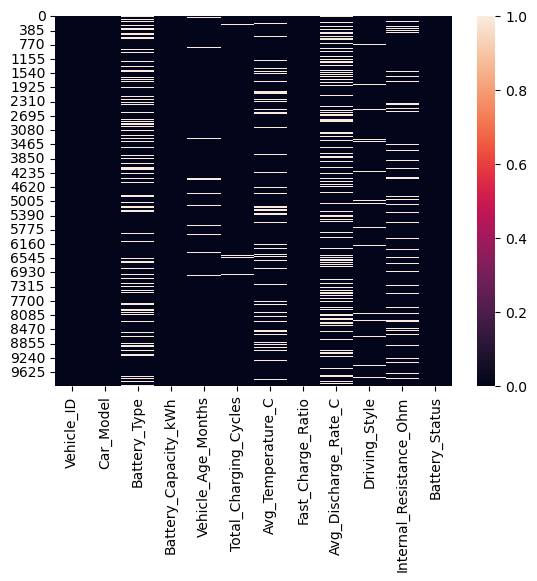

In [8]:
sns.heatmap(df.isna())

In [9]:
df['Car_Model'].fillna(df['Car_Model'].mode(),inplace=True)
df["Battery_Type"].fillna(df["Battery_Type"].mode(),inplace=True)
df["Driving_Style"].fillna(df["Driving_Style"].mode(),inplace=True)


In [10]:
df["Vehicle_Age_Months"].fillna(df["Vehicle_Age_Months"].median(),inplace=True)
df["Total_Charging_Cycles"].fillna(df["Total_Charging_Cycles"].median(),inplace=True)
df["Avg_Temperature_C"].fillna(df["Avg_Temperature_C"].median(),inplace=True)
df["Avg_Discharge_Rate_C"].fillna(df["Avg_Discharge_Rate_C"].median(),inplace=True)
df["Internal_Resistance_Ohm"].fillna(df["Internal_Resistance_Ohm"].median(),inplace=True)

In [11]:
df.isna().sum()

Vehicle_ID                    0
Car_Model                     0
Battery_Type               2032
Battery_Capacity_kWh          0
Vehicle_Age_Months            0
Total_Charging_Cycles         0
Avg_Temperature_C             0
Fast_Charge_Ratio             0
Avg_Discharge_Rate_C          0
Driving_Style               403
Internal_Resistance_Ohm       0
Battery_Status                0
dtype: int64

<Axes: >

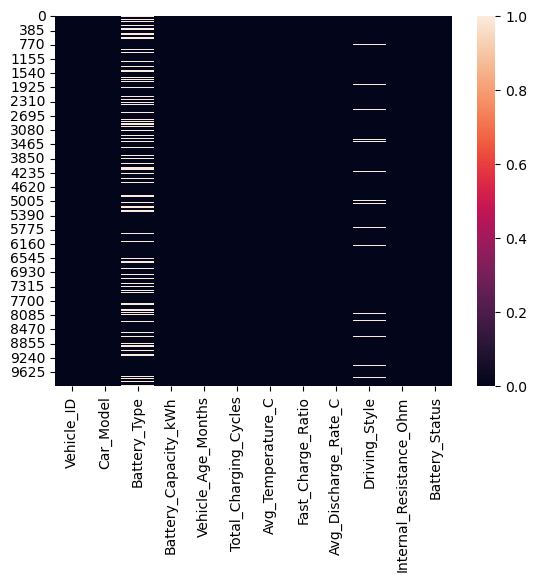

In [12]:
sns.heatmap(df.isna())

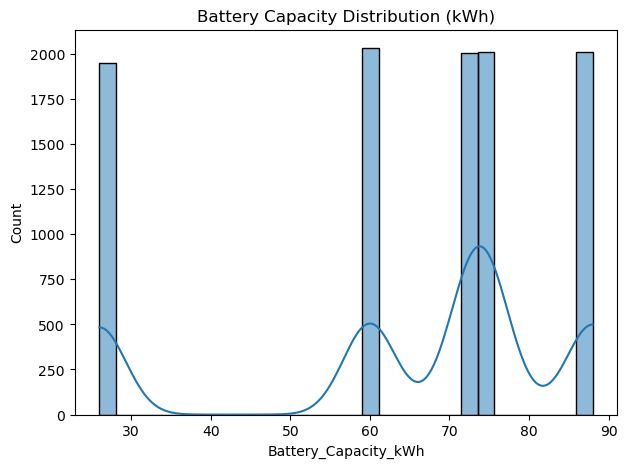

In [42]:
plt.figure(figsize=(7,5))
sns.histplot(df['Battery_Capacity_kWh'], bins=30, kde=True)
plt.title("Battery Capacity Distribution (kWh)")
plt.show()

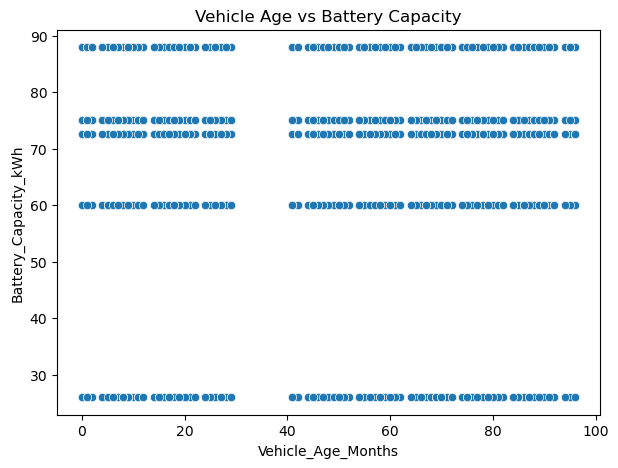

In [43]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='Vehicle_Age_Months',
    y='Battery_Capacity_kWh',
    data=df
)
plt.title("Vehicle Age vs Battery Capacity")
plt.show()


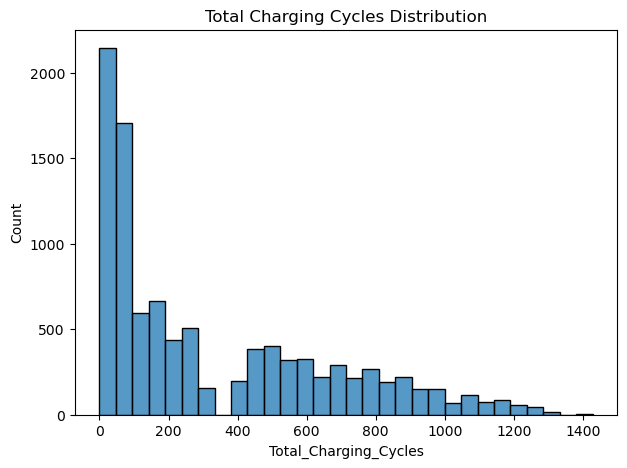

In [44]:
plt.figure(figsize=(7,5))
sns.histplot(df['Total_Charging_Cycles'], bins=30)
plt.title("Total Charging Cycles Distribution")
plt.show()


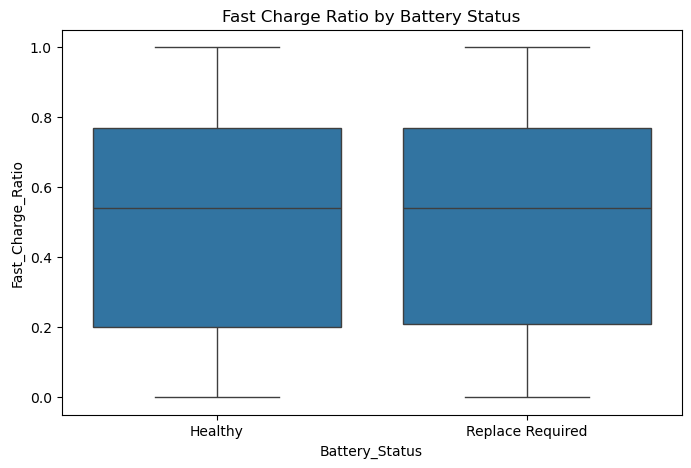

In [46]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x='Battery_Status',
    y='Fast_Charge_Ratio',
    data=df
)
plt.title("Fast Charge Ratio by Battery Status")
plt.show()


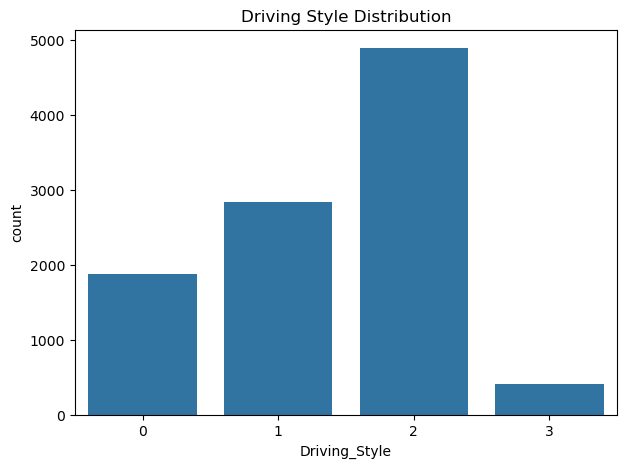

In [47]:
plt.figure(figsize=(7,5))
sns.countplot(x='Driving_Style', data=df)
plt.title("Driving Style Distribution")
plt.show()


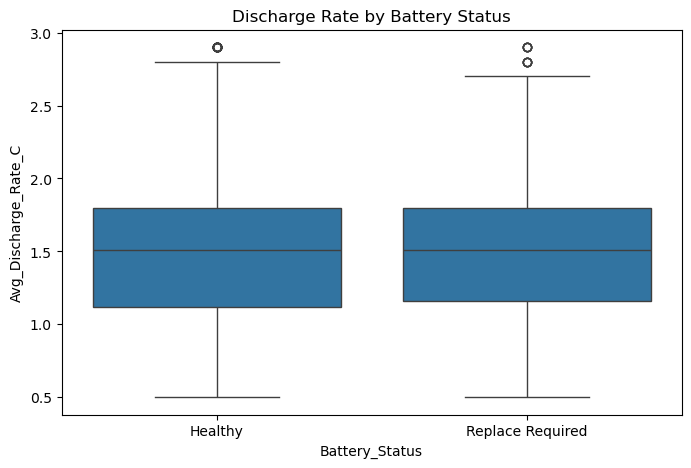

In [48]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x='Battery_Status',
    y='Avg_Discharge_Rate_C',
    data=df
)
plt.title("Discharge Rate by Battery Status")
plt.show()


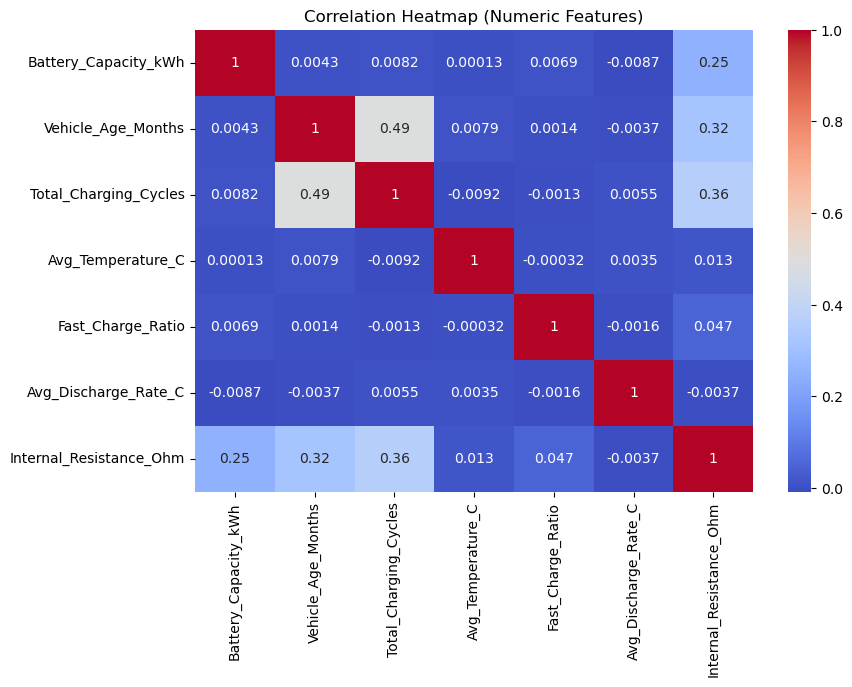

In [49]:
plt.figure(figsize=(9,6))
sns.heatmap(
    df.select_dtypes(include=['float64']).corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [13]:
label=LabelEncoder()
car=["Car_Model","Battery_Type","Driving_Style"]
for col in car:
     df[col]=df[col].astype(str)
     df[col]=label.fit_transform(df[col])
    

In [14]:
# le = LabelEncoder()
# df["Car_Model",] = le.fit_transform(df["Car_Model"])



In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle_ID               10000 non-null  object 
 1   Car_Model                10000 non-null  int32  
 2   Battery_Type             10000 non-null  int32  
 3   Battery_Capacity_kWh     10000 non-null  float64
 4   Vehicle_Age_Months       10000 non-null  float64
 5   Total_Charging_Cycles    10000 non-null  float64
 6   Avg_Temperature_C        10000 non-null  float64
 7   Fast_Charge_Ratio        10000 non-null  float64
 8   Avg_Discharge_Rate_C     10000 non-null  float64
 9   Driving_Style            10000 non-null  int32  
 10  Internal_Resistance_Ohm  10000 non-null  float64
 11  Battery_Status           10000 non-null  object 
dtypes: float64(7), int32(3), object(2)
memory usage: 820.4+ KB


In [16]:
x=df.drop(columns=['Vehicle_ID','Battery_Type','Driving_Style','Battery_Status'])
y=df["Battery_Status"]

In [17]:
scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [19]:
svc=SVC()
svc

SVC()

In [20]:
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [21]:
acc=accuracy_score(y_test,y_pred)
acc

0.878

In [22]:
print(classification_report(y_test,y_pred))

                  precision    recall  f1-score   support

         Healthy       0.88      1.00      0.94      1756
Replace Required       0.00      0.00      0.00       244

        accuracy                           0.88      2000
       macro avg       0.44      0.50      0.47      2000
    weighted avg       0.77      0.88      0.82      2000



In [23]:
svc1=SVC(kernel='linear')
svc2=SVC(kernel='sigmoid')
svc3=SVC(kernel='poly')
svc4=SVC(kernel='rbf')
list1=[svc1,svc2,svc3,svc4]
kernels=['linear','sigmoid','poly','rbf']
Result=[]
for i in list1:
    if i==svc1:
        {
            print("For Linear:")
        }
    elif i==svc2:
        {
            print("For Sigmoid:")
        }
    elif i==svc3:
        {
            print("For Poly:")
        }
    elif i==svc4:
        {
            print("For Rbf:")
        }
    i.fit(x_train,y_train)
    y_pred=svc.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    Result.append(acc)
    print('ACC',acc)
    print(classification_report(y_test,y_pred))
    

For Linear:
ACC 0.878
                  precision    recall  f1-score   support

         Healthy       0.88      1.00      0.94      1756
Replace Required       0.00      0.00      0.00       244

        accuracy                           0.88      2000
       macro avg       0.44      0.50      0.47      2000
    weighted avg       0.77      0.88      0.82      2000

For Sigmoid:
ACC 0.878
                  precision    recall  f1-score   support

         Healthy       0.88      1.00      0.94      1756
Replace Required       0.00      0.00      0.00       244

        accuracy                           0.88      2000
       macro avg       0.44      0.50      0.47      2000
    weighted avg       0.77      0.88      0.82      2000

For Poly:
ACC 0.878
                  precision    recall  f1-score   support

         Healthy       0.88      1.00      0.94      1756
Replace Required       0.00      0.00      0.00       244

        accuracy                           0.88      2000

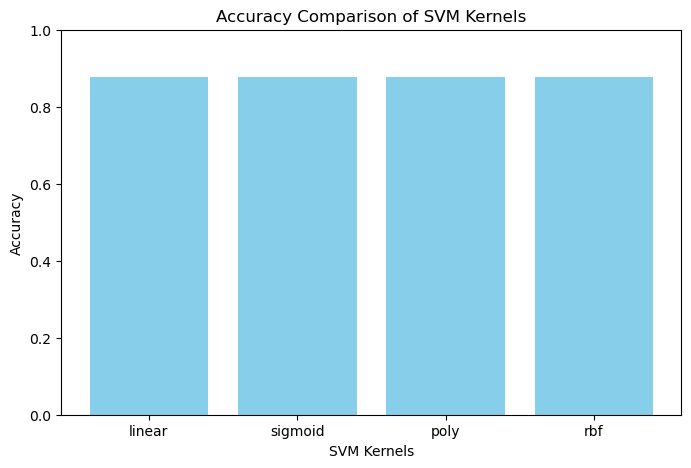

In [24]:
plt.figure(figsize=(8,5))
plt.bar(kernels, Result, color='skyblue')
plt.xlabel("SVM Kernels")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of SVM Kernels")
plt.ylim(0, 1)
plt.show()


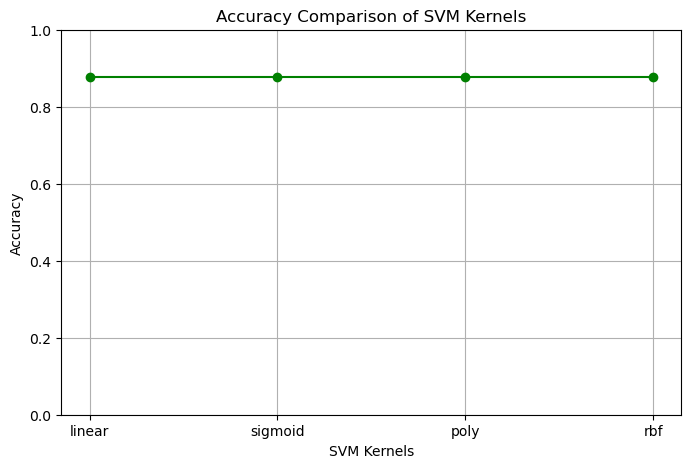

In [25]:
plt.figure(figsize=(8,5))
plt.plot(kernels, Result, marker='o', linestyle='-', color='green')
plt.xlabel("SVM Kernels")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of SVM Kernels")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [26]:
print(Result)

[0.878, 0.878, 0.878, 0.878]


In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

In [28]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [29]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC())
])


In [34]:
param_grid = { 'svc__C': [0.1, 1, 10],
              'svc__kernel': ['linear', 'rbf', 'poly'],
              'svc__gamma': ['scale', 'auto'] 
             }

In [38]:
grid = GridSearchCV( estimator=pipeline,
                    param_grid=param_grid,
                    cv=5, scoring='accuracy',
                    n_jobs=-1 
                   )
grid.fit(x_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [41]:
best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8855
[[1771    0]
 [ 229    0]]
                  precision    recall  f1-score   support

         Healthy       0.89      1.00      0.94      1771
Replace Required       0.00      0.00      0.00       229

        accuracy                           0.89      2000
       macro avg       0.44      0.50      0.47      2000
    weighted avg       0.78      0.89      0.83      2000

